In [34]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

We'll start out with a very simple classification task using a simple numerical data set,For this simple task, we'll be creating our own example data set.

In [ ]:
train_labels = []
train_samples = []

for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [3]:
# we can think of the way we specify the input_shape here as acting as an implicit input layer, because we don't specify the input layer but rather the input data itself is the input layer 
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'), # this is the first hidden layer and by specifing the input shape, we are telling the model that it will receive 1 dimensional data.
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642 (2.51 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the model
The first thing we need to do to get the model ready for training is call the compile() function on it.

In [5]:

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


### Training the model

Now that the model is compiled, we can train it using the fit() function.



In [ ]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30,shuffle=True, verbose=2) 
# validation_split is for held out validation set is created before the shuffle so here we are taking the last 10% of the training set as validation set
# so i general we wanna make sure that our dataset shuffled before any split so that the model does not learn any patterns about the order
# verbose = 1 gives us a progress bar 
# verbose = 0 gives us no progress bar 
# verbose = 2 gives us progress bar 
# shuffle True is by default True 

Epoch 1/30
189/189 - 2s - 8ms/step - accuracy: 0.4598 - loss: 0.7537 - val_accuracy: 0.4667 - val_loss: 0.7317
Epoch 2/30
189/189 - 0s - 2ms/step - accuracy: 0.4884 - loss: 0.7194 - val_accuracy: 0.5286 - val_loss: 0.6975
Epoch 3/30
189/189 - 1s - 3ms/step - accuracy: 0.7005 - loss: 0.6835 - val_accuracy: 0.8429 - val_loss: 0.6691
Epoch 4/30
189/189 - 0s - 3ms/step - accuracy: 0.7989 - loss: 0.6543 - val_accuracy: 0.7762 - val_loss: 0.6415
Epoch 5/30
189/189 - 0s - 2ms/step - accuracy: 0.7952 - loss: 0.6250 - val_accuracy: 0.8333 - val_loss: 0.6134
Epoch 6/30
189/189 - 0s - 2ms/step - accuracy: 0.8185 - loss: 0.5977 - val_accuracy: 0.8429 - val_loss: 0.5880
Epoch 7/30
189/189 - 0s - 2ms/step - accuracy: 0.8222 - loss: 0.5719 - val_accuracy: 0.8381 - val_loss: 0.5623
Epoch 8/30
189/189 - 0s - 2ms/step - accuracy: 0.8376 - loss: 0.5469 - val_accuracy: 0.8476 - val_loss: 0.5368
Epoch 9/30
189/189 - 0s - 2ms/step - accuracy: 0.8429 - loss: 0.5218 - val_accuracy: 0.8476 - val_loss: 0.5115
E

### test samples

In [7]:
test_labels =  []
test_samples = []

for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

### Predictions
we use the predict function

In [8]:
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0
) 

In [9]:
rounded_predictions = np.argmax(predictions, axis=-1)

for i in rounded_predictions:
    print(i)

1
1
1
1
1
1
0
0
1
1
1
0
0
1
0
1
1
1
0
1
1
0
0
1
1
1
0
1
1
1
1
0
1
0
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
0
1
1
1
1
0
0
0
0
0
0
0
1
1
1
1
1
0
1
1
0
0
0
1
0
0
1
0
0
1
0
0
1
0
1
1
0
0
1
0
0
1
0
0
1
1
0
1
0
0
1
0
1
1
0
1
1
1
1
0
0
0
1
1
1
1
1
0
1
0
0
0
0
0
0
1
0
1
0
0
1
0
1
0
1
0
0
1
1
0
0
1
1
1
0
0
0
0
0
0
0
0
1
0
1
1
1
1
1
1
0
0
0
1
1
0
1
1
0
0
1
0
0
0
1
0
1
0
0
1
1
1
1
0
1
0
0
1
0
0
1
1
1
0
1
1
1
1
1
1
1
0
0
0
0
1
0
1
0
0
1
1
0
0
1
0
0
0
0
0
1
1
0
0
1
1
1
1
0
1
0
1
0
1
1
1
1
0
1
0
1
0
1
0
1
1
0
1
0
0
0
0
0
0
1
0
0
1
1
1
0
0
1
0
1
0
0
1
0
0
1
1
1
1
1
1
0
1
1
1
1
1
0
0
1
1
1
1
1
1
0
0
0
0
0
1
0
1
1
1
0
1
0
0
0
0
0
0
0
1
1
0
1
1
1
0
1
0
1
0
1
0
1
0
0
0
0
0
1
1
1
0
1
0
0
0
1
1
0
0
1
1
1
1
0
1
0
0
1
0
0
1
1
1
1
1
1
0
1
0
0
0
0
1
1
1
1
0
1
0
0
0
0
1
0
0
0
0
1
0
0
1
0
1
0
1
0
0
1
0
0
0
0
1
1
1
0
1
1
0
1
0
1
1
1
0
1
1
0
0
1
1
0
1
1
1
1
1
0
0
1


Confusion matrix, without normalization
[[190  20]
 [ 10 200]]


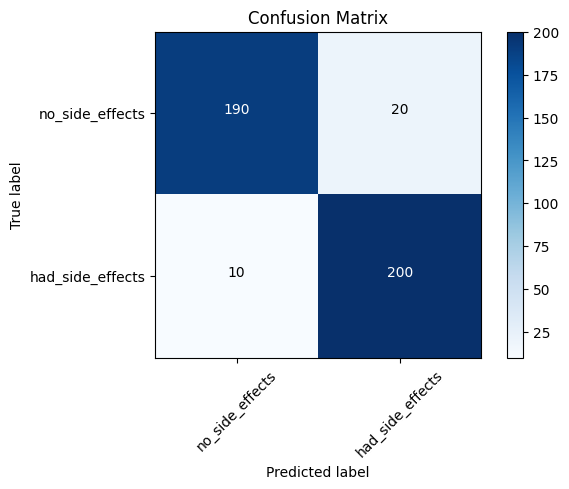

In [15]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)
cm_plot_labels = ['no_side_effects','had_side_effects']

# we have a function called plot_confusion_matrix() that came directly from scikit-learn's website. This is code that they provide in order to plot the confusion matrix.

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
plt.show()

### save and load the model 
there are a few options here we can use first,
- model.save() : it save the architecture of the model, the wieghts, the training cofigs like loss and optimizations..., and the state of the optimizer which allows us to resume directly from where we left off 
- model.load_model() : to load the model and the weights from the saved model.


In [19]:
if path.isfile('models/seq_model.keras') is False:
    model.save('models/seq_model.keras')

In [21]:
new_model = load_model('models/seq_model.keras')
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,286 (5.03 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 644 (2.52 KB)

we can also use, 
- model.to_json(): if we only need to save the architecture of the model, no wieghts no training configs...

In [22]:
json_string = model.to_json()
json_string

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_layer"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "ker

In [25]:
model_architecture = model_from_json(json_string)
model_architecture.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,286 (5.03 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 644 (2.52 KB)

or we can only save the model's weights by,
- model.save_weights()

In [33]:
model.save_weights('models/model.weights.h5')
